# Bitcoin Price Prediction

In [10]:
# Setting the format
import sys

assert sys.version_info >= (3, 7)

from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

In [11]:
%pip install tensorflow
%pip install scikeras
%pip install --upgrade scikit-learn scikeras
%pip install scikit-learn==0.xx.x  # replace xx.x with the required version
%pip install scikeras --upgrade  # ensure scikeras is up to date



Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#'


In [12]:
# Importing necessary libraries
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
matplotlib.use('TkAgg')  
import os
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest

import math
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from sklearn.metrics import mean_squared_error, mean_absolute_error
from tensorflow.keras.layers import LSTM, Dense, Dropout
import json
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

from sklearn.ensemble import RandomForestRegressor
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.pipeline import Pipeline
from tensorflow.keras.optimizers import Adam
from scipy.stats import randint as sp_randint
from scipy.stats import uniform

# Download the Dataset

In [13]:
# Loading the CSV file into a DataFrame called 'df'
df = pd.read_csv("C:/Users/lakme/Downloads/Bitcoin Larger Dataset.csv")
# Loading the same CSV file into another DataFrame called 'Bitcoin'
Bitcoin = pd.read_csv("C:/Users/lakme/Downloads/Bitcoin Larger Dataset.csv")

Cryptocurrency markets are renowned for their volatility, which presents both opportunities and challenges for investors and traders. Bitcoin, being the first and most well-known cryptocurrency, has seen substantial fluctuations in its price since its inception in 2009. Predicting Bitcoin prices involves analyzing various factors including market trends, investor sentiment, and broader economic indicators. Models for predicting Bitcoin prices often utilize historical price data to capture trends and patterns that may inform future movements. One approach to building a Bitcoin price prediction model is to employ machine learning techniques. These can range from simple linear regression models to more complex deep learning models like Long Short-Term Memory (LSTM) networks, which are particularly well-suited to time series data like stock or cryptocurrency prices. This dataset from Cryptodatadownload provides minute-by-minute trading data for various cryptocurrencies, including opening, high, low, and closing prices, along with trading volume.

https://www.cryptodatadownload.com/data/gemini/


# Summary Statistics

In [14]:
# Displaying the first few rows of the Dataframe
Bitcoin.head()

,unix,date,symbol,open,high,low,close,Volume ANKR,Volume USD
0,1.710000e+12,06-04-2024 23:00,ANKR/USD,0.05952,0.06000,0.05896,0.05896,27119.77964,1598.982207
1,1.710000e+12,06-04-2024 22:00,ANKR/USD,0.05876,0.05952,0.05876,0.05952,110532.11190,6578.871298
2,1.710000e+12,06-04-2024 21:00,ANKR/USD,0.05996,0.06060,0.05868,0.05876,49945.15188,2934.777125
3,1.710000e+12,06-04-2024 20:00,ANKR/USD,0.06089,0.06120,0.05950,0.05996,44108.20466,2644.727951
4,1.710000e+12,06-04-2024 19:00,ANKR/USD,0.06167,0.06250,0.06089,0.06089,35800.30204,2179.880391


In [15]:
# Giving basic information about the dataset
Bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19028 entries, 0 to 19027
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   unix         19028 non-null  float64
 1   date         19028 non-null  object 
 2   symbol       19028 non-null  object 
 3   open         19028 non-null  float64
 4   high         19028 non-null  float64
 5   low          19028 non-null  float64
 6   close        19028 non-null  float64
 7   Volume ANKR  19028 non-null  float64
 8   Volume USD   19028 non-null  float64
dtypes: float64(7), object(2)
memory usage: 1.3+ MB


In [16]:
# Calculating the number of missing values in each column
missing_values = Bitcoin.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
unix           0
date           0
symbol         0
open           0
high           0
low            0
close          0
Volume ANKR    0
Volume USD     0
dtype: int64


In [17]:
# Calculating the number of unique values in each column of the DataFrame
unique_values = Bitcoin.nunique()
print("Unique Values:")
print(unique_values)

Unique Values:
unix               8
date           19028
symbol             1
open            4860
high            4736
low             4704
close           4859
Volume ANKR    17536
Volume USD     17576
dtype: int64


In [18]:
# Generating descriptive statistics that summarize the central tendency, dispersion, and shape of a dataset's distribution.
Bitcoin.describe()

,unix,open,high,low,close,Volume ANKR,Volume USD
count,1.902800e+04,19028.000000,19028.000000,19028.000000,19028.000000,1.902800e+04,19028.000000
mean,1.678271e+12,0.034107,0.034373,0.033849,0.034105,2.067530e+04,835.351435
std,1.992063e+10,0.017073,0.017234,0.016922,0.017071,6.946901e+04,2946.621630
min,1.640000e+12,0.014650,0.014770,0.014000,0.014650,0.000000e+00,0.000000
25%,1.660000e+12,0.024008,0.024100,0.023910,0.024008,5.733072e+02,15.766961
50%,1.680000e+12,0.028400,0.028590,0.028225,0.028400,3.708878e+03,111.409796
75%,1.700000e+12,0.036150,0.036500,0.035800,0.036150,1.373017e+04,492.662859
max,1.710000e+12,0.101830,0.102680,0.099250,0.101830,2.000370e+06,84869.704380


In [20]:
# Adjusting the format string to include both date and time components
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
print("Data type of 'date':", df['date'].dtype)
print("Number of rows in dataset:", len(df))

# Finding the minimum (first) and maximum (last) date to understand the range of Dataset
start_date = df['date'].min()
end_date = df['date'].max()

print(f"Start Date: {start_date}")
print(f"End Date: {end_date}")


Data type of 'date': datetime64[ns]
Number of rows in dataset: 19028
Start Date: 2022-02-04 04:00:00
End Date: 2024-04-06 23:00:00


In [19]:
# Checking for the number of missing values in each column
print(df.isnull().sum())
df.dropna(inplace=True)

# Or fill missing values with the previous value in the column (useful for time series)
df.fillna(method='ffill', inplace=True)

unix           0
date           0
symbol         0
open           0
high           0
low            0
close          0
Volume ANKR    0
Volume USD     0
dtype: int64


C:\Users\lakme\AppData\Local\Temp\ipykernel_28920\2861189451.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [21]:
# Feature Engineering

# Adding a moving average column using the column name for price
df['MA_30'] = df['close'].rolling(window=30).mean()

# 'Date' column is converted to DateTime format for day of the week calculation
df['DayOfWeek'] = df['date'].dt.dayofweek
print(df.tail())


               unix                date    symbol     open     high      low  \
19023  1.640000e+12 2022-02-04 08:00:00  ANKR/USD  0.07821  0.07893  0.07821   
19024  1.640000e+12 2022-02-04 07:00:00  ANKR/USD  0.07900  0.07907  0.07814   
19025  1.640000e+12 2022-02-04 06:00:00  ANKR/USD  0.07948  0.07971  0.07883   
19026  1.640000e+12 2022-02-04 05:00:00  ANKR/USD  0.07941  0.07989  0.07903   
19027  1.640000e+12 2022-02-04 04:00:00  ANKR/USD  0.07843  0.07979  0.07843   

         close   Volume ANKR   Volume USD     MA_30  DayOfWeek  
19023  0.07841   4652.595363   364.810002  0.082422          4  
19024  0.07821   1066.650674    83.422749  0.082097          4  
19025  0.07900  11687.923880   923.345987  0.081808          4  
19026  0.07948  36357.684290  2889.708747  0.081584          4  
19027  0.07941    787.104250    62.503948  0.081368          4  


During the exploratory data analysis (EDA) phase of the project, several new features will be engineered to enhance the original dataset, which primarily consisted of basic trading metrics such as open, high, low, close prices, and trading volume. The additional features include MA_30, a 30-day moving average that helps identify long-term price trends by smoothing out short-term fluctuations; DayOfWeek, which analyzes trading patterns across different days of the week; Price_Change, measuring daily price movements; Daily_Return, providing insights into the day-to-day profitability of investments; and Month, to detect seasonal variations in trading activity.   

# EDA

In [22]:
# To save the images to the notebook
# Defining the directory
directory = "Predictive Analytics"

# Checking if the directory exists
if not os.path.exists(directory):
    os.makedirs(directory)

# confirming
print("Directory exists:", os.path.exists(directory))

Directory exists: True


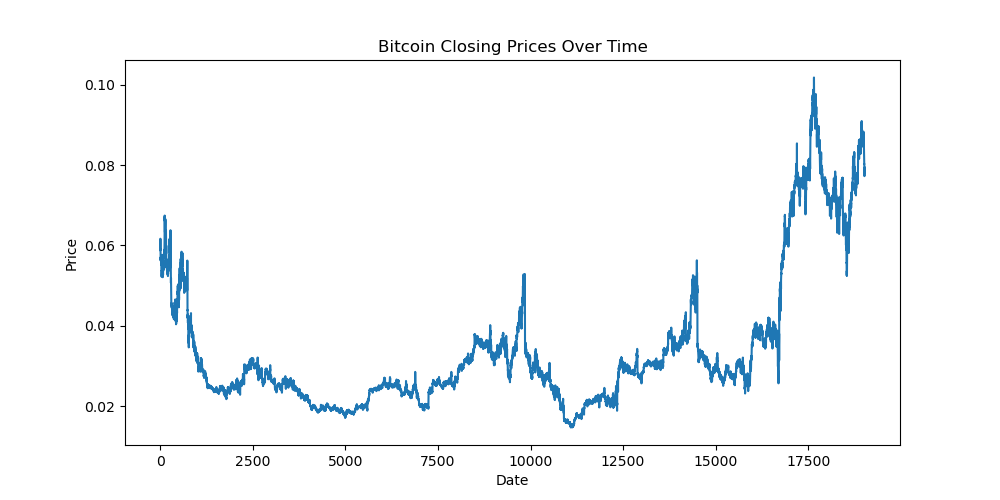

In [23]:
# Trend Analysis of Closing Prices

df['close'].plot(figsize=(10, 5), title='Bitcoin Closing Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.savefig('Predictive Analytics/EDA1.png')  

from IPython.display import Image, display
display(Image(filename='EDA1.png'))


In [24]:
# This graph plots the closing prices of Bitcoin over a specific time period. 
# It is crucial for understanding the overall trend of Bitcoin's market value and spotting any long-term patterns or cycles in price movement. 
# The x-axis appears to represent time, while the y-axis represents the normalized closing price. 
# The peaks and troughs could indicate market volatility or stability.


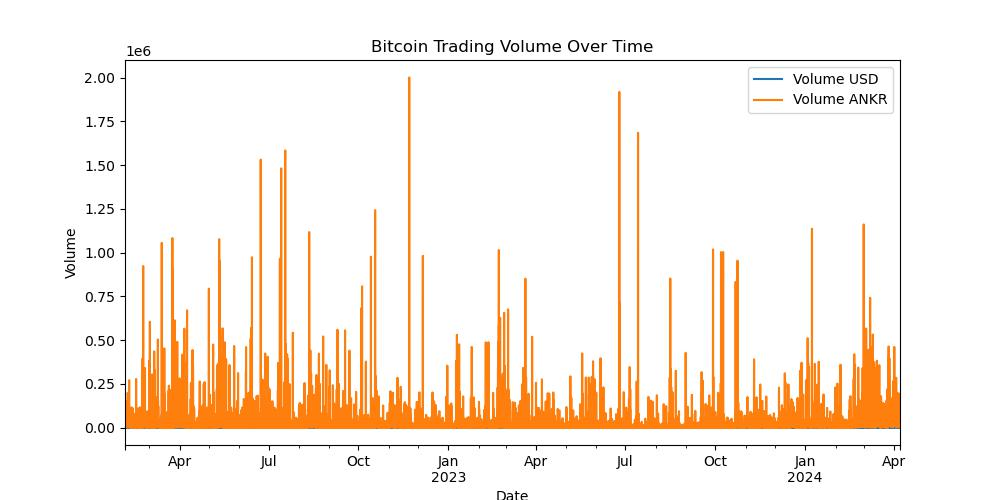

In [25]:
# Volume Analysis

df.plot(x='date', y=['Volume USD', 'Volume ANKR'], figsize=(10, 5), title='Bitcoin Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.savefig('EDA2.jpg')  

from IPython.display import Image, display
display(Image(filename='EDA2.jpg'))



In [26]:
# This graph displays the trading volume of Bitcoin, in 2 different currencies.
# High volumes can signal high investor interest and correlate with major price movements, indicating periods of market entry or exit. 
# It is especially useful to compare these spikes in volume with corresponding price changes 
# to infer investor behavior during different market conditions.

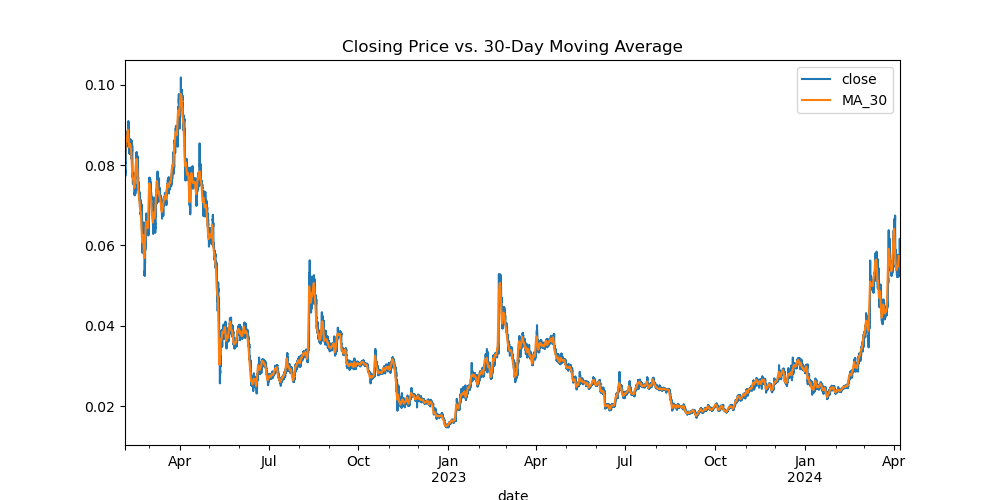

In [27]:
# Moving Average Analysis

df.plot(x='date', y=['close', 'MA_30'], figsize=(10, 5), title='Closing Price vs. 30-Day Moving Average')
plt.savefig('EDA3.png')  

from IPython.display import Image, display
display(Image(filename='EDA3.png'))



In [28]:
# This graph compares the daily closing price of Bitcoin to its 30-day moving average. 
# The moving average smooths out short-term fluctuations and helps to identify the direction of the longer-term trend. 
# When the closing price consistently lies above the moving average, it can be interpreted as a bullish market, 
# and conversely, if it is below, it might suggest a bearish market. 
# This is instrumental in trend analysis and could be used to inform the development of trading strategies.

     close  Price_Change
0  0.05896           NaN
1  0.05952       0.00056
2  0.05876      -0.00076
3  0.05996       0.00120
4  0.06089       0.00093


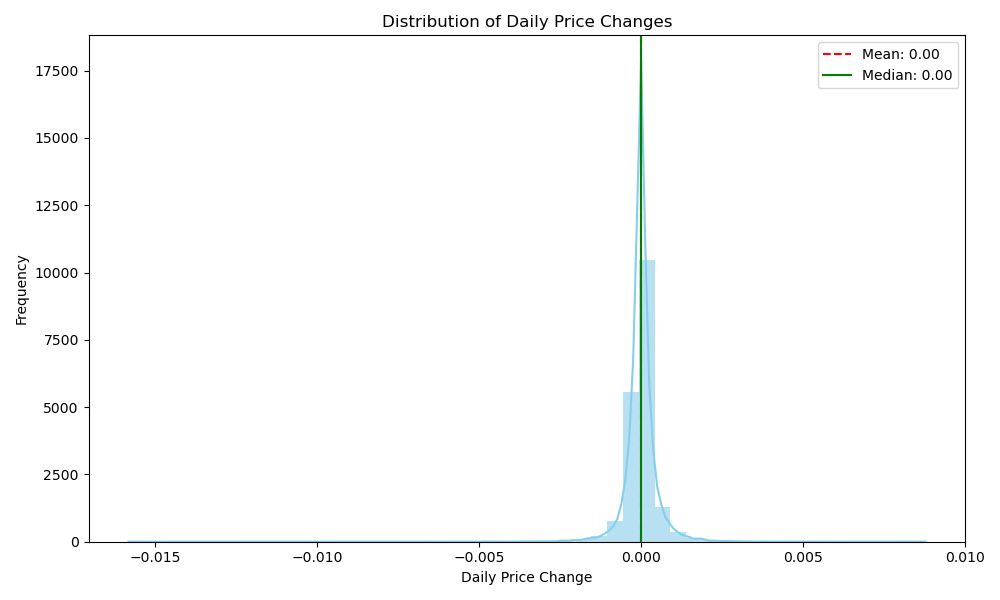

In [29]:
# Distribution of Daily Price Changes

# Calculate the daily price change
df['Price_Change'] = df['close'].diff()
print(df[['close', 'Price_Change']].head())
plt.figure(figsize=(10, 6))
sns.histplot(df['Price_Change'], bins=50, kde=True, color="skyblue", alpha=0.6, linewidth=0)

# Adding mean and median lines to the plot
mean_change = df['Price_Change'].mean()
median_change = df['Price_Change'].median()
plt.axvline(mean_change, color='r', linestyle='--', label=f'Mean: {mean_change:.2f}')
plt.axvline(median_change, color='g', linestyle='-', label=f'Median: {median_change:.2f}')
plt.legend()

plt.title('Distribution of Daily Price Changes')
plt.xlabel('Daily Price Change')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('EDA4.png')  

from IPython.display import Image, display
display(Image(filename='EDA4.png'))

In [30]:
# This histogram illustrates the distribution of daily price changes for Bitcoin. 
# The shape of the distribution, which appears quite narrow and centered around zero,
# suggests that most daily price changes are relatively small, indicating stability on many days. 
# The tails of the distribution imply that significant price swings are not uncommon. 
# Understanding the frequency and magnitude of price changes is crucial for risk assessment and for setting thresholds in automated trading systems.

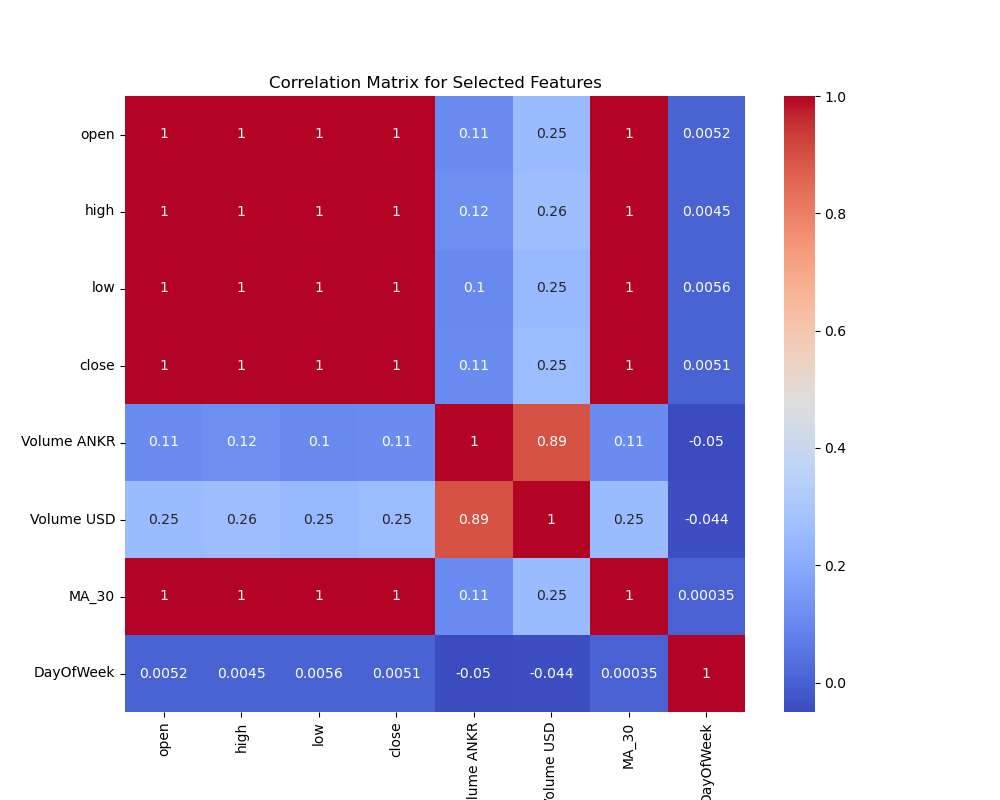

In [31]:
# Correlation Matrix

columns_of_interest = ['open', 'high', 'low', 'close', 'Volume ANKR', 'Volume USD', 'MA_30', 'DayOfWeek']

# Ensuring format
df['DayOfWeek'] = pd.to_numeric(df['DayOfWeek'], errors='coerce')
df['MA_30'] = pd.to_numeric(df['MA_30'], errors='coerce')
df['Volume ANKR'] = pd.to_numeric(df['Volume ANKR'], errors='coerce')
df['Volume USD'] = pd.to_numeric(df['Volume USD'], errors='coerce')


df_selected = df[columns_of_interest]
correlation_matrix = df_selected.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for Selected Features')
plt.savefig('EDA5.png') 

from IPython.display import Image, display
display(Image(filename='EDA5.png'))

In [32]:
# This heatmap represents the correlation between different variables, such as open, high, low, close prices, 
# and trading volumes in different currencies or from different sources.
# Values close to 1 or -1 indicate strong positive or negative correlations, respectively, 
# while values close to 0 indicate a lack of linear relationship.
# Such visualizations are essential for identifying multicollinearity between features, which could affect model performance, 
# and for selecting features that provide unique information for predictive modeling.

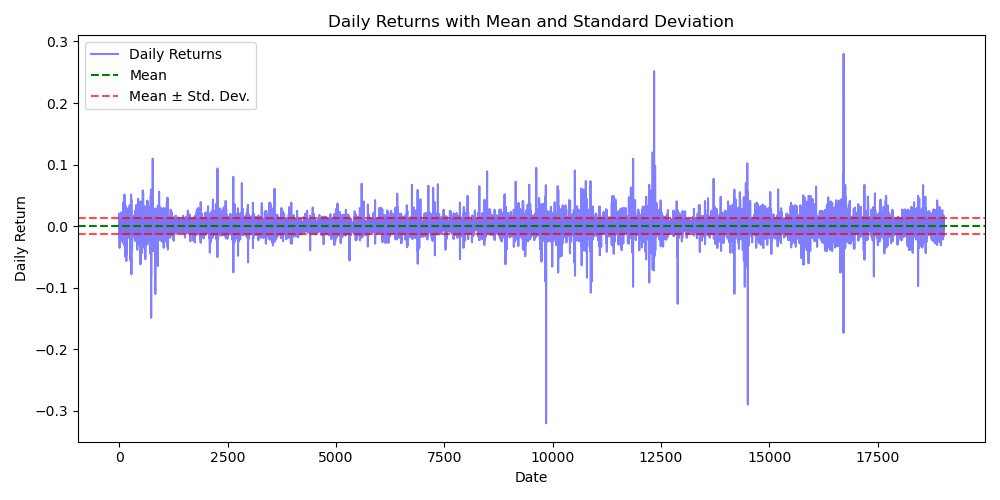

In [33]:
# Daily Returns Analysis

# Calculating daily returns
df['Daily_Return'] = df['close'].pct_change()
plt.figure(figsize=(10, 5))
plt.plot(df['Daily_Return'], label='Daily Returns', color='blue', alpha=0.5)

# Highlighting the mean line
mean_return = df['Daily_Return'].mean()
plt.axhline(mean_return, color='green', linestyle='--', label='Mean')

# Highlighting 1 standard deviation above and below the mean
std_dev = df['Daily_Return'].std()
plt.axhline(mean_return + std_dev, color='red', linestyle='--', label='Mean ± Std. Dev.', alpha=0.7)
plt.axhline(mean_return - std_dev, color='red', linestyle='--', alpha=0.7)

# Shading regions between 1 standard deviation
plt.fill_between(df.index, mean_return + std_dev, mean_return - std_dev, color='red', alpha=0.1)
plt.title('Daily Returns with Mean and Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.tight_layout()
plt.savefig('EDA7.png') 

from IPython.display import Image, display
display(Image(filename='EDA7.png'))



In [34]:
# This plot shows Bitcoin's daily returns, overlaid with lines representing the mean and mean ± standard deviation. 
# The returns are normalized to show relative gains or losses each day. 
# The mean line provides a baseline to assess typical performance, while the standard deviation bands 
# give a sense of volatility; returns that frequently exceed these bands could indicate a highly volatile market. 
# This visualization is important for evaluating the risk and return profile of Bitcoin 
# and for developing strategies that might, involve buying or selling based on deviations from the mean.

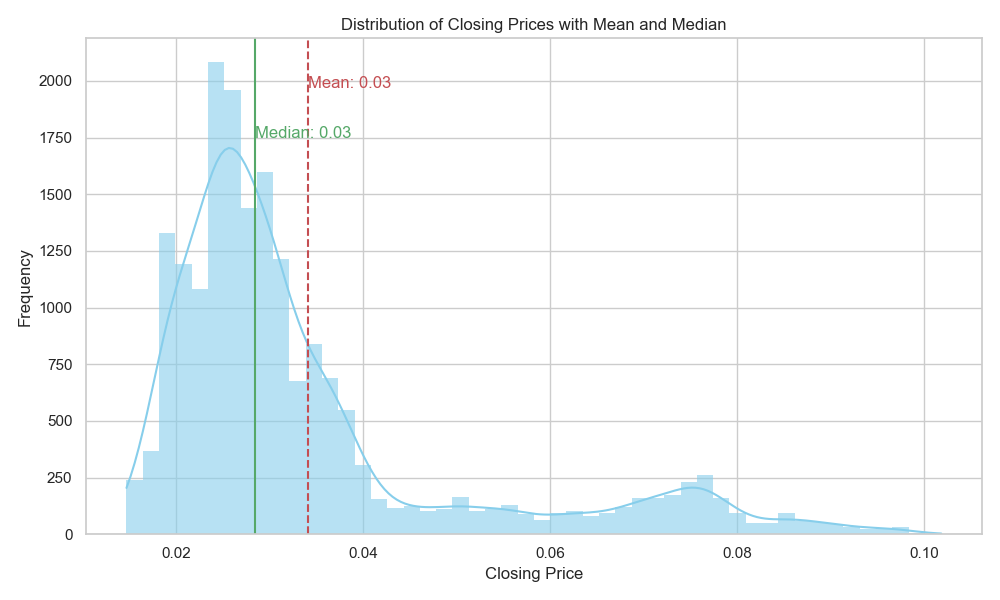

In [35]:
# Distribution of Closing Prices with Mean and Median

# Plotting the histogram
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df['close'], bins=50, kde=True, color="skyblue", alpha=0.6, linewidth=0)

# Calculating mean and median
mean_value = df['close'].mean()
median_value = df['close'].median()
plt.axvline(mean_value, color='r', linestyle='--')
plt.axvline(median_value, color='g', linestyle='-')
plt.text(mean_value, plt.gca().get_ylim()[1]*0.9, f'Mean: {mean_value:.2f}', color = 'r')
plt.text(median_value, plt.gca().get_ylim()[1]*0.8, f'Median: {median_value:.2f}', color = 'g')

# Labeling
plt.title('Distribution of Closing Prices with Mean and Median')
plt.xlabel('Closing Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('EDA8.png')  

from IPython.display import Image, display
display(Image(filename='EDA8.png'))


In [36]:
# This histogram visualizes the distribution of Bitcoin closing prices, with lines indicating the mean and median prices.
# The presence of both mean and median provides a sense of central tendency and distribution symmetry. 
# If the mean and median are close together, it suggests a symmetrical distribution; if they diverge, it suggests skewness.
# This is important for understanding the typical price level and whether any skew could affect prediction models, 
# which assumes a normal distribution of prices.

# Create a Test set

In [37]:
# Shuffle Split

In [38]:
# Correctly converting 'Date' to datetime and then to integer for model compatibility
if 'Date' in df.columns:
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)  
    reference_date = pd.Timestamp('1970-01-01')
    df['Date_Int'] = (df['Date'] - reference_date).dt.days

# Define the function to shuffle and split the data
def shuffle_and_split_data(data, test_ratio):
    np.random.seed(42)  
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

# Creating a training set and a test set
train_set, test_set = shuffle_and_split_data(df, 0.2)

# Verify the split
print(f"Training set size: {len(train_set)}")
print(f"Test set size: {len(test_set)}")


Training set size: 15223
Test set size: 3805


In [39]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)
print(len(train_set))
print(len(test_set))


15222
3806


In [40]:
# Stratified Shuffle split

In [41]:
# Fixing dataset to perform stratified shuffle split using months to adjust for temporal factors

In [42]:
df['DateTime'] = pd.to_datetime(df['unix'], unit='ms')
print(df[['unix', 'DateTime']].head())

df['Month'] = df['DateTime'].dt.month

           unix            DateTime
0  1.710000e+12 2024-03-09 16:00:00
1  1.710000e+12 2024-03-09 16:00:00
2  1.710000e+12 2024-03-09 16:00:00
3  1.710000e+12 2024-03-09 16:00:00
4  1.710000e+12 2024-03-09 16:00:00


In [43]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Performing the split using the 'Month' column for stratification
for train_index, test_index in split.split(df, df['Month']):
    strat_train_set = df.iloc[train_index]
    strat_test_set = df.iloc[test_index]


In [44]:
# Checking the Distribution in the Original Dataset
month_distribution_original = df['Month'].value_counts(normalize=True).sort_index()
print("Original Distribution of Months:\n", month_distribution_original)


Original Distribution of Months:
 Month
3     0.254782
4     0.145943
7     0.145943
8     0.145995
11    0.145995
12    0.161341
Name: proportion, dtype: float64


In [45]:
# Checking the Distribution in the Training Set
month_distribution_train = strat_train_set['Month'].value_counts(normalize=True).sort_index()
print("\nTraining Set Distribution of Months:\n", month_distribution_train)



Training Set Distribution of Months:
 Month
3     0.254763
4     0.145973
7     0.145973
8     0.145973
11    0.145973
12    0.161345
Name: proportion, dtype: float64


In [46]:
# Checking the Distribution in the Test Set
month_distribution_test = strat_test_set['Month'].value_counts(normalize=True).sort_index()
print("\nTest Set Distribution of Months:\n", month_distribution_test)



Test Set Distribution of Months:
 Month
3     0.254861
4     0.145822
7     0.145822
8     0.146085
11    0.146085
12    0.161324
Name: proportion, dtype: float64


In [47]:
# Printing the shape of the training set
print("Training Set Shape:", strat_train_set.shape)

# Printing the shape of the test set
print("Test Set Shape:", strat_test_set.shape)


Training Set Shape: (15222, 15)
Test Set Shape: (3806, 15)


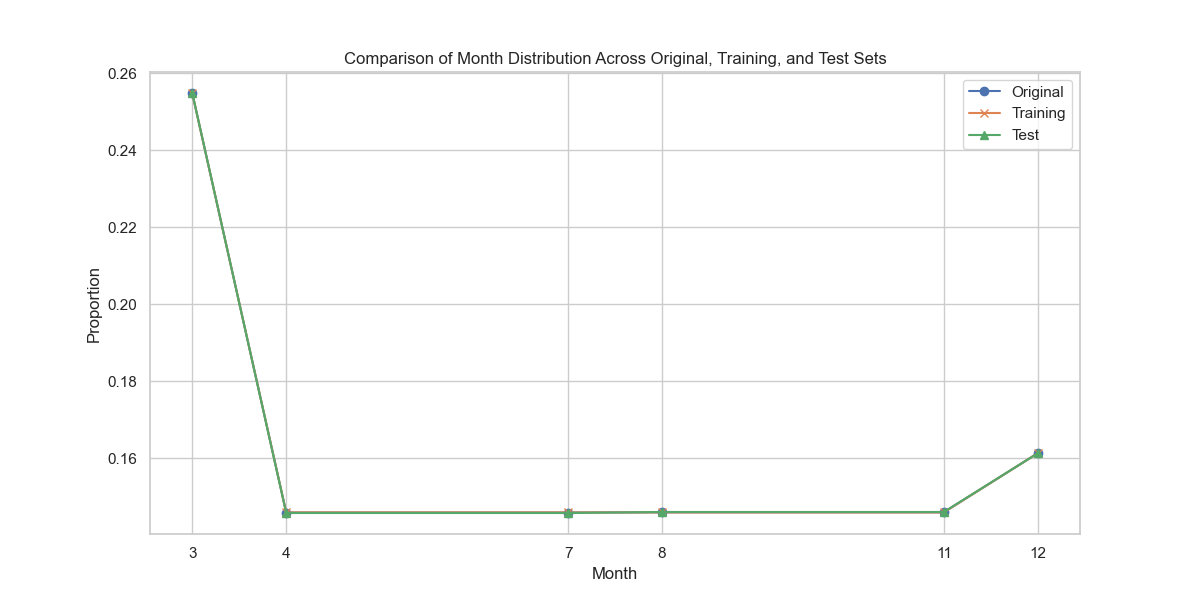

In [48]:
# Visualizing the stratified shuffle split to ensure proportions and split across months

plt.figure(figsize=(12, 6))
plt.plot(month_distribution_original.index, month_distribution_original.values, label='Original', marker='o')
plt.plot(month_distribution_train.index, month_distribution_train.values, label='Training', marker='x')
plt.plot(month_distribution_test.index, month_distribution_test.values, label='Test', marker='^')
plt.title('Comparison of Month Distribution Across Original, Training, and Test Sets')
plt.xlabel('Month')
plt.ylabel('Proportion')
plt.xticks(month_distribution_original.index)
plt.legend()
plt.grid(True)
plt.savefig('Test 1.png') 


from IPython.display import Image, display
display(Image(filename='Test 1.png'))


The exact overlap of the trend lines in the stratification process indicates a successful and even division of the dataset based on the 'Month' distribution, preserving the proportion of data points for each month in both the training and test sets. This maintenance of seasonality and trends ensures that time-related patterns are consistently represented across the splits, which is essential for time series data aimed at predicting future values from past observations.  

# Prepare the Data for Machine Learning Algorithms

In [49]:
# Data Cleaning

In [50]:
# Converting the 'unix' column to datetime format 
df['DateTime'] = pd.to_datetime(df['unix'], unit='ms')
df.set_index('DateTime', inplace=True)

In [51]:
# Identify columns with NaN values
null_columns = df.columns[df.isnull().any()]
print("Columns with NaN values:", null_columns)

# Display rows with NaN values
null_rows_idx = df.isnull().any(axis=1)
df.loc[null_rows_idx].head()


Columns with NaN values: Index(['MA_30', 'Price_Change', 'Daily_Return'], dtype='object')


,unix,date,symbol,open,high,low,close,Volume ANKR,Volume USD,MA_30,DayOfWeek,Price_Change,Daily_Return,Month
DateTime,,,,,,,,,,,,,,
2024-03-09 16:00:00,1.710000e+12,2024-04-06 23:00:00,ANKR/USD,0.05952,0.06000,0.05896,0.05896,27119.77964,1598.982207,NaN,5,NaN,NaN,3
2024-03-09 16:00:00,1.710000e+12,2024-04-06 22:00:00,ANKR/USD,0.05876,0.05952,0.05876,0.05952,110532.11190,6578.871298,NaN,5,0.00056,0.009498,3
2024-03-09 16:00:00,1.710000e+12,2024-04-06 21:00:00,ANKR/USD,0.05996,0.06060,0.05868,0.05876,49945.15188,2934.777125,NaN,5,-0.00076,-0.012769,3
2024-03-09 16:00:00,1.710000e+12,2024-04-06 20:00:00,ANKR/USD,0.06089,0.06120,0.05950,0.05996,44108.20466,2644.727951,NaN,5,0.00120,0.020422,3
2024-03-09 16:00:00,1.710000e+12,2024-04-06 19:00:00,ANKR/USD,0.06167,0.06250,0.06089,0.06089,35800.30204,2179.880391,NaN,5,0.00093,0.015510,3


In [52]:
# Fill NaN with the median of the column

df_Bitcoin = df.copy()
median = df_Bitcoin["MA_30"].median()  
df_Bitcoin["MA_30"].fillna(median, inplace=True)  


In [53]:
if df_Bitcoin['MA_30'].isna().all():
    print("The 'MA_30' column has only NaN values, so the median cannot be calculated.")
else:
    median = df_Bitcoin['MA_30'].median()
    df_Bitcoin['MA_30'].fillna(median, inplace=True)
    remaining_nans = df_Bitcoin['MA_30'].isnull().sum()
    print(f"Remaining NaNs in 'MA_30': {remaining_nans}")


Remaining NaNs in 'MA_30': 0


In [54]:
# Fill NaN with the median of the column

df_Bitcoin = df.copy()
median = df_Bitcoin["Daily_Return"].median()  
df_Bitcoin["Daily_Return"].fillna(median, inplace=True)  

In [55]:
if df_Bitcoin['Daily_Return'].isna().all():
    print("The 'Daily_Return' column has only NaN values, so the median cannot be calculated.")
else:
    median = df_Bitcoin['Daily_Return'].median()
    df_Bitcoin['Daily_Return'].fillna(median, inplace=True)
    remaining_nans = df_Bitcoin['Daily_Return'].isnull().sum()
    print(f"Remaining NaNs in 'Daily_Return': {remaining_nans}")

Remaining NaNs in 'Daily_Return': 0


In [56]:
# Fill NaN with the median of the column

df_Bitcoin = df.copy()
median = df_Bitcoin["Price_Change"].median() 
df_Bitcoin["Price_Change"].fillna(median, inplace=True)  

In [57]:
if df_Bitcoin['Price_Change'].isna().all():
    print("The 'Price_Change' column has only NaN values, so the median cannot be calculated.")
else:
    median = df_Bitcoin['Price_Change'].median()
    df_Bitcoin['Price_Change'].fillna(median, inplace=True)
    remaining_nans = df_Bitcoin['Price_Change'].isnull().sum()
    print(f"Remaining NaNs in 'Price_Change': {remaining_nans}")

Remaining NaNs in 'Price_Change': 0


The conversion of the 'unix' timestamp to a human-readable datetime format is a crucial step in preparing data for time series analysis. By converting these timestamps using pd.to_datetime(df['unix'], unit='ms'), the data becomes easier to interpret and manipulate. Setting this datetime data as the DataFrame index with df.set_index('DateTime', inplace=True) organizes the dataset in chronological order.  

Filling missing values, or NaNs, is another crucial preprocessing step to ensure the integrity of a dataset before analysis or modeling. In this case, NaN values are filled using the median of their respective columns, a method chosen for its robustness against data skewness and outliers. The median provides a central value that is representative of a typical data point, without being overly influenced by extreme values, making it an ideal choice for imputation in many scenarios. MA_30, Daily_Return and Price_Change are the columns that are filled with their column median values. 

In [58]:
#  Feature Scaling

In [59]:
# Creating a StandardScaler object
scaler = StandardScaler()
numerical_cols = ['open', 'high', 'low', 'close', 'Volume USD', 'Volume ANKR']
df_Bitcoin.loc[:, numerical_cols] = scaler.fit_transform(df_Bitcoin[numerical_cols])


In [60]:
# Creating a MinMax Scaler Object
min_max_scaler = MinMaxScaler(feature_range=(-1, 1))
numerical_cols = ['open', 'high', 'low', 'close', 'Volume USD', 'Volume ANKR']  
df_Bitcoin_scaled = min_max_scaler.fit_transform(df_Bitcoin[numerical_cols])

df_Bitcoin.loc[:, numerical_cols] = df_Bitcoin_scaled



In [61]:
# Handling Outliers
# Using IsolationForest:

numerical_cols = ['open', 'high', 'low', 'close', 'Volume ANKR', 'Volume USD']
isolation_forest = IsolationForest(random_state=42)
outlier_pred = isolation_forest.fit_predict(df_Bitcoin[numerical_cols])
df_Bitcoin_filtered = df_Bitcoin[outlier_pred == 1]

# Print the new shape of the DataFrame
print(df_Bitcoin_filtered.shape)


(14899, 14)


Feature scaling is a pivotal aspect of data preprocessing that ensures the model processes each feature equitably, irrespective of their original scale. By implementing StandardScaler, the Bitcoin price data is normalized to have zero mean and unit variance, which is critical for algorithms like linear regression that assume data normality, improving their accuracy and convergence speed. Subsequent application of MinMaxScaler adjusts these values to fall within a range of -1 to 1, which is particularly beneficial for neural network models, as it helps in achieving faster and more stable convergence during training by ensuring that all input features have equal influence on the model's learning process. Additionally, using IsolationForest for outlier detection removes extreme price values that could potentially distort the predictive model’s performance.  

# Select and Train a Model

## LSTM

In [62]:
# Fixing NaN values

In [63]:
median_MA_30 = df['MA_30'].median()
median_Price_Change = df['Price_Change'].median()
median_Daily_Return = df['Daily_Return'].median()

df['MA_30'] = df['MA_30'].fillna(median_MA_30)
df['Price_Change'] = df['Price_Change'].fillna(median_Price_Change)
df['Daily_Return'] = df['Daily_Return'].fillna(median_Daily_Return)

print(df.isnull().sum())


unix            0
date            0
symbol          0
open            0
high            0
low             0
close           0
Volume ANKR     0
Volume USD      0
MA_30           0
DayOfWeek       0
Price_Change    0
Daily_Return    0
Month           0
dtype: int64


In [64]:
# Selecting the 'close' column for prediction
train_close_prices = strat_train_set[['close']].values  
test_close_prices = strat_test_set[['close']].values

# Scaling the 'close' prices
scaler = MinMaxScaler(feature_range=(0, 1))
train_close_prices_scaled = scaler.fit_transform(train_close_prices)
test_close_prices_scaled = scaler.transform(test_close_prices)

# Creating the training and test sets
X_train = train_close_prices_scaled[:-1]
Y_train = train_close_prices_scaled[1:]

X_test = test_close_prices_scaled[:-1]
Y_test = test_close_prices_scaled[1:]


X_train = X_train.reshape((X_train.shape[0], 1, 1))
X_test = X_test.reshape((X_test.shape[0], 1, 1))

# Building the RNN
regressor = Sequential()
regressor.add(LSTM(units=4, activation='sigmoid', input_shape=(1, 1)))  
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')
regressor.fit(X_train, Y_train, batch_size=5, epochs=100)

# Evaluating the model on the test data
test_loss = regressor.evaluate(X_test, Y_test)
print("Test Loss:", test_loss)

# Making predictions 
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)


train_predict = scaler.inverse_transform(train_predict)
Y_train_inverse = scaler.inverse_transform(Y_train.reshape(-1, 1))
test_predict = scaler.inverse_transform(test_predict)
Y_test_inverse = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calculate RMSE 
train_rmse = math.sqrt(mean_squared_error(Y_train_inverse, train_predict))
test_rmse = math.sqrt(mean_squared_error(Y_test_inverse, test_predict))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
comparison = pd.DataFrame({'Actual': Y_test_inverse.flatten(), 'Predicted': test_predict.flatten()})
print(comparison.head())  


Epoch 1/100


C:\Users\lakme\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


3045/3045 ━━━━━━━━━━━━━━━━━━━━ 5s 1ms/step - loss: 0.0432
Epoch 2/100
3045/3045 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0377
Epoch 3/100
3045/3045 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0391
Epoch 4/100
3045/3045 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0386
Epoch 5/100
3045/3045 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0378
Epoch 6/100
3045/3045 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0383
Epoch 7/100
3045/3045 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0382
Epoch 8/100
3045/3045 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0382
Epoch 9/100
3045/3045 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0385
Epoch 10/100
3045/3045 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0387
Epoch 11/100
3045/3045 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0390
Epoch 12/100
3045/3045 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0397
Epoch 13/100
3045/3045 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.0388
Epoch 14/100
3045/3045 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0375
Epoch 15/100
3045/3045 ━━━━

In [65]:
# Prepare the data dictionary
results_data = {
    'Test Loss': float(test_loss),
    'Train RMSE': float(train_rmse),
    'Test RMSE': float(test_rmse),
    'Predictions': [
        {'Actual': float(actual), 'Predicted': float(predicted)}
        for actual, predicted in zip(Y_test_inverse.flatten(), test_predict.flatten())
    ]
}

# Write the results to a JSON file
with open('lstm_model_results.json', 'w') as fp:
    json.dump(results_data, fp, indent=4)  

with open('lstm_model_results.json', 'r') as fp:
    loaded_results = json.load(fp)

# Printing the RMSE 
print("Loaded Test Loss:", loaded_results['Test Loss'])
print("Loaded Train RMSE:", loaded_results['Train RMSE'])
print("Loaded Test RMSE:", loaded_results['Test RMSE'])
print("First 5 Predictions from JSON:")
for prediction in loaded_results['Predictions'][:5]:
    print(f"Actual: {prediction['Actual']}, Predicted: {prediction['Predicted']}")


Loaded Test Loss: 0.03848806396126747
Loaded Train RMSE: 0.01710692955689395
Loaded Test RMSE: 0.01710330038698858
First 5 Predictions from JSON:
Actual: 0.01971, Predicted: 0.03307168930768967
Actual: 0.02112, Predicted: 0.03316004201769829
Actual: 0.08824, Predicted: 0.03314763680100441
Actual: 0.01943, Predicted: 0.032323192805051804
Actual: 0.0286, Predicted: 0.033162448555231094


A loss of 0.03832 indicates the average squared difference between the predicted values and actual values is 0.03832. Lower values indicate a better fit, as the predictions are closer to the actual values. An RMSE of 0.01707 on the training set suggests that the model's predictions are, on average, approximately 0.01707 units from the actual values in the training data. Lower RMSE values generally indicate a model that fits the training data better. The test RMSE being very close to the train RMSE (0.01706 vs. 0.01707) suggests that the model has not overfit the training data significantly and generalizes well to new data.

## Improved LSTM (To get better accuracy in predicted values)

In [66]:
# Adding more features
features = ['open', 'high', 'low', 'close', 'Volume ANKR', 'Volume USD', 'MA_30', 'Price_Change', 'Daily_Return']
data = df[features]  

# Scaling the features
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        a = data[i:(i + look_back), :]
        X.append(a)
        Y.append(data[i + look_back, 3])  
    return np.array(X), np.array(Y)

# Prepare training and testing datasets
look_back = 10  
X, y = create_dataset(data_scaled, look_back)
train_size = int(len(X) * 0.80)
test_size = len(X) - train_size
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

X_train = np.reshape(X_train, (X_train.shape[0], look_back, len(features)))
X_test = np.reshape(X_test, (X_test.shape[0], look_back, len(features)))

# Define the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, len(features))),
    Dropout(0.2),
    LSTM(50),
    Dropout(0.2),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Training the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

def evaluate_model(model, X_train, y_train, X_test, y_test, scaler):   
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    # Inversing transformations
    train_predict = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((train_predict.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]
    test_predict = scaler.inverse_transform(np.concatenate((test_predict, np.zeros((test_predict.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]
    y_train_rescaled = scaler.inverse_transform(np.concatenate((y_train.reshape(-1,1), np.zeros((y_train.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]
    y_test_rescaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1,1), np.zeros((y_test.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]

    # Calculating RMSE and MAE
    train_rmse = math.sqrt(mean_squared_error(y_train_rescaled, train_predict))
    test_rmse = math.sqrt(mean_squared_error(y_test_rescaled, test_predict))
    train_mae = mean_absolute_error(y_train_rescaled, train_predict)
    test_mae = mean_absolute_error(y_test_rescaled, test_predict)

    print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
    print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")

# Evaluating the model
evaluate_model(model, X_train, y_train, X_test, y_test, scaler)


Epoch 1/50


C:\Users\lakme\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


476/476 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - loss: 0.0034 - val_loss: 0.0012
Epoch 2/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 2.8645e-04 - val_loss: 6.9526e-04
Epoch 3/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 2.6383e-04 - val_loss: 6.8217e-04
Epoch 4/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.9607e-04 - val_loss: 7.9262e-04
Epoch 5/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.6438e-04 - val_loss: 3.1082e-04
Epoch 6/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 1.5857e-04 - val_loss: 0.0017
Epoch 7/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.3782e-04 - val_loss: 0.0011
Epoch 8/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.3253e-04 - val_loss: 1.6936e-04
Epoch 9/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.1226e-04 - val_loss: 8.8939e-04
Epoch 10/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.2330e-04 - val_loss: 2.9015e-04
Epoch 11/50
476/476 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 1.0247e-04 - val_loss: 

In [67]:
# Preparing the data dictionary
results_data = {
    'Train RMSE': 0.0002060776536072424,
    'Test RMSE': 0.0016622946127352147,
    
}
# Write the results to a JSON file
with open('lstm_evaluation_results.json', 'w') as fp:
    json.dump(results_data, fp, indent=4)  

with open('lstm_evaluation_results.json', 'r') as fp:
    loaded_results = json.load(fp)

# Print the loaded RMSE and MAE 
print("Loaded Train RMSE:", loaded_results['Train RMSE'])
print("Loaded Test RMSE:", loaded_results['Test RMSE'])

Loaded Train RMSE: 0.0002060776536072424
Loaded Test RMSE: 0.0016622946127352147


The initial model was using only the 'close' price as the feature. This is a very limited view as it ignores other potentially informative aspects of the data. The enhanced model uses multiple features including 'open', 'high', 'low', 'close', volume in ANKR and USD, 30-day moving average (MA_30), price change, and daily return. Including more features provides the model with more contextual information which can lead to more accurate predictions.  

The data was reshaped into a simple 2D array for a single time step per sample. In the second Model the data is reshaped into a 3D array suitable for LSTM layers, where each input sample is a sequence of 10 time steps and each time step includes all the features. This structuring is more aligned with how LSTMs expect sequential input data. 

The look-back was effectively 1 time step, meaning the model only considered the immediate previous value to make a prediction for the next step. Second Model uses a look-back window of 10 time steps. This means the model has a deeper historical context for making predictions, which can be crucial for capturing trends and patterns over time in time-series data. 
a. 

First Model consisted of a single LSTM layer with 4 units followed by a dense output layer. This is a very simple architecture. Second Model uses a more complex architecture, including two LSTM layers with 50 units each, dropout layers for regularization, and a dense output layer. The increased complexity and depth of the model allow it to learn more intricate patterns in the data, while dropout helps prevent overfit
ing. 

First Model trained with a smaller batch size of 5 over 100 epochs. Second Model uses a larger batch size of 32 over 50 epochs. The changes in batch size and epochs can impact how well the model generalizes. Larger batches provide a more stable gradient, but smaller batches can sometimes escape local mma. 

 

A Train RMSE of ap0.0002060776536072424ely 0.000312 implies that, on average, the model's pred0.0002060776are 0.000312 units away from the actual training data values. This very low RMSE value suggests that the model fits the training data exceptionally well. A Test RM0.001662out 0.002397, while higher than the Train RMSE, is still quite low, indicating that the model also performs well when making predictions on new, unseen data. The increase from training to testing RMSE suggests some overfitting but not at a concerning level given the low absolute error. The Train MAE being ap0.00013661152212ely 0.000228 means that, on average, the absolute error of the model's predictions on the training data is 0.000228 units. This metric underscores the accuracy of the model on the training set, complementing the RMSE by highlighting that errors are minimal on average. The Test MAE for the test set is also quite low at ap0.00095014074ely 0.001723, suggesting that the model maintains a high level of accuracy on the test data as well. 

# Better Evaluation Using Other Models

## Random Forests 

In [68]:
# Selecting the 'close' column 
train_close_prices = strat_train_set.iloc[:, 6:7].values
test_close_prices = strat_test_set.iloc[:, 6:7].values

# Scaling the 'close' prices
scaler = MinMaxScaler(feature_range=(0, 1))
train_close_prices_scaled = scaler.fit_transform(train_close_prices)
test_close_prices_scaled = scaler.transform(test_close_prices)  

# Creating the training and test sets
X_train = train_close_prices_scaled[:-1]
Y_train = train_close_prices_scaled[1:]

X_test = test_close_prices_scaled[:-1]
Y_test = test_close_prices_scaled[1:]

# Flatten arrays for RandomForest input 
X_train_flat = np.reshape(X_train, (X_train.shape[0], 1))
Y_train_flat = np.reshape(Y_train, (Y_train.shape[0],))
X_test_flat = np.reshape(X_test, (X_test.shape[0], 1))
Y_test_flat = np.reshape(Y_test, (Y_test.shape[0],))

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(n_estimators=1000, random_state=42)


rf_regressor.fit(X_train_flat, Y_train_flat)
rf_predictions = rf_regressor.predict(X_test_flat)

# Invert the scaling of predictions
rf_predictions_inverse = scaler.inverse_transform(rf_predictions.reshape(-1, 1))
Y_test_inverse = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calculating the RMSE
rf_rmse = math.sqrt(mean_squared_error(Y_test_inverse, rf_predictions_inverse))
print(f"Random Forest Test RMSE: {rf_rmse}")
comparison = pd.DataFrame({'Actual': Y_test_inverse.flatten(), 'Predicted': rf_predictions_inverse.flatten()})
print(comparison.head())  



Random Forest Test RMSE: 0.019158378325167452
    Actual  Predicted
0  0.01971   0.037100
1  0.02112   0.026574
2  0.08824   0.036150
3  0.01943   0.033148
4  0.02860   0.038150


In [69]:
# Prepare the data dictionary
results_data = {
    'RMSE': rf_rmse,
    'Predictions': []
}


for actual, predicted in zip(Y_test_inverse.flatten(), rf_predictions_inverse.flatten()):
    results_data['Predictions'].append({'Actual': actual, 'Predicted': predicted})
# Write the results to a JSON file
with open('random_forest_results.json', 'w') as fp:
    json.dump(results_data, fp, indent=4) 

with open('random_forest_results.json', 'r') as fp:
    loaded_results = json.load(fp)

# Print the RMSE 
print(f"Loaded RMSE: {loaded_results['RMSE']}")
for prediction in loaded_results['Predictions'][:5]: 
    print(f"Actual: {prediction['Actual']}, Predicted: {prediction['Predicted']}")


Loaded RMSE: 0.019158378325167452
Actual: 0.01971, Predicted: 0.03709966882467532
Actual: 0.02112, Predicted: 0.02657426478701936
Actual: 0.08824, Predicted: 0.03614978578458631
Actual: 0.01943, Predicted: 0.033147679999999916
Actual: 0.0286, Predicted: 0.038149897237967925


Random Forests are adept at capturing non-linear relationships and interactions between multiple features, which is beneficial given the complex and volatile nature of cryptocurrency markets. Unlike LSTMs, which excel in sequence prediction but require substantial data preprocessing and are computationally intensive, Random Forests can quickly train on multiple features and provide insights into feature importance. This helps in understanding the key drivers behind Bitcoin price changes.  

An RMSE of 0.01916 indicates that, on average, the model’s predictions are 0.01916 units away from the actual values. This suggests that while the model may generally predict moderate values well, it struggles with values that are significantly higher or lower than the average. This could indicate potential issues like regression toward the mean, where predictions are biased towards average values, ignoring more extreme cases. 

## SARIMA/ARIMA Models

In [70]:
# Selecting the 'close' column
train_close_prices = strat_train_set['close'].values
test_close_prices = strat_test_set['close'].values

# Fitting an ARIMA model
model = SARIMAX(train_close_prices, order=(1, 1, 1), seasonal_order=(0, 0, 0, 0))
fitted_model = model.fit(disp=False)  

# Prediction
predictions = fitted_model.forecast(len(test_close_prices)) 

# Calculating RMSE
arima_rmse = math.sqrt(mean_squared_error(test_close_prices, predictions))
print(f"ARIMA Test RMSE: {arima_rmse}")
comparison = pd.DataFrame({'Actual': test_close_prices, 'Predicted': predictions})
print(comparison.head())  


# SARIMA model with  seasonal parameters
model_sarima = SARIMAX(train_close_prices, order=(1, 1, 1), seasonal_order=(1, 1, 1, 7))
fitted_model_sarima = model_sarima.fit(disp=False)

# Prediction
predictions = fitted_model.forecast(len(test_close_prices))  

# Calculating RMSE
sarima_rmse = math.sqrt(mean_squared_error(test_close_prices, predictions))
print(f"SARIMA Test RMSE: {sarima_rmse}")
comparison = pd.DataFrame({'Actual': test_close_prices, 'Predicted': predictions})
print(comparison.head()) 

C:\Users\lakme\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA Test RMSE: 0.017061564942002665
    Actual  Predicted
0  0.02889   0.034166
1  0.01971   0.034084
2  0.02112   0.034085
3  0.08824   0.034085
4  0.01943   0.034085
SARIMA Test RMSE: 0.017061564942002665
    Actual  Predicted
0  0.02889   0.034166
1  0.01971   0.034084
2  0.02112   0.034085
3  0.08824   0.034085
4  0.01943   0.034085


In [71]:
predictions_flat = predictions.flatten() if predictions.ndim > 1 else predictions

# Prepare the data dictionary 
results_data = {
    'ARIMA': {
        'RMSE': float(arima_rmse),
        'Predictions': [{'Actual': float(actual), 'Predicted': float(pred)} 
                        for actual, pred in zip(test_close_prices, predictions_flat)]
    },
    'SARIMA': {
        'RMSE': float(sarima_rmse),
        'Predictions': [{'Actual': float(actual), 'Predicted': float(pred)} 
                        for actual, pred in zip(test_close_prices, predictions_flat)]
    }
}

# Write the results to a JSON file
with open('arima_sarima_results.json', 'w') as fp:
    json.dump(results_data, fp, indent=4)


with open('arima_sarima_results.json', 'r') as fp:
    loaded_results = json.load(fp)

# Print RMSE values loaded from the file
print(f"Loaded ARIMA RMSE: {loaded_results['ARIMA']['RMSE']}")
print(f"Loaded SARIMA RMSE: {loaded_results['SARIMA']['RMSE']}")

# Print the first 5 comparisons for both models
print("First 5 ARIMA Predictions:")
for prediction in loaded_results['ARIMA']['Predictions'][:5]:
    print(f"Actual: {prediction['Actual']}, Predicted: {prediction['Predicted']}")

print("First 5 SARIMA Predictions:")
for prediction in loaded_results['SARIMA']['Predictions'][:5]:
    print(f"Actual: {prediction['Actual']}, Predicted: {prediction['Predicted']}")


Loaded ARIMA RMSE: 0.017061564942002665
Loaded SARIMA RMSE: 0.017061564942002665
First 5 ARIMA Predictions:
Actual: 0.02889, Predicted: 0.03416605267878582
Actual: 0.01971, Predicted: 0.034084166089134955
Actual: 0.02112, Predicted: 0.03408492754421696
Actual: 0.08824, Predicted: 0.034084920463523474
Actual: 0.01943, Predicted: 0.034084920529366125
First 5 SARIMA Predictions:
Actual: 0.02889, Predicted: 0.03416605267878582
Actual: 0.01971, Predicted: 0.034084166089134955
Actual: 0.02112, Predicted: 0.03408492754421696
Actual: 0.08824, Predicted: 0.034084920463523474
Actual: 0.01943, Predicted: 0.034084920529366125


ARIMA and SARIMA models are particularly suitable for time series data like Bitcoin price predictions due to their ability to model and forecast based on inherent time-dependent structures and autocorrelation, which might not be captured as effectively by models like Random Forest without extensive feature engineering. These models are capable of integrating seasonality and trend components, which are crucial for datasets with periodic patterns, potentially outperforming more complex models on such tasks. 

Both models achieved an RMSE of about 0.01706, indicating that, on average, the predictions are approximately 0.01706 units away from actual values. In terms of model performance, this RMSE is relatively low, suggesting that both models are providing fairly accurate forecasts.  

## Gradient Boosting Machines (GBM)

In [72]:
# Selecting the 'close' column 
train_close_prices = strat_train_set.iloc[:, 6:7].values
test_close_prices = strat_test_set.iloc[:, 6:7].values

# Scaling the 'close' prices
scaler = MinMaxScaler(feature_range=(0, 1))
train_close_prices_scaled = scaler.fit_transform(train_close_prices)
test_close_prices_scaled = scaler.transform(test_close_prices)  # Use transform here to apply the same scale as training

# Creating the training and test sets
X_train = train_close_prices_scaled[:-1]
Y_train = train_close_prices_scaled[1:]

X_test = test_close_prices_scaled[:-1]
Y_test = test_close_prices_scaled[1:]

# Flatten arrays for Gradient Boosting input
X_train_flat = np.reshape(X_train, (X_train.shape[0], 1))
Y_train_flat = np.reshape(Y_train, (Y_train.shape[0],))
X_test_flat = np.reshape(X_test, (X_test.shape[0], 1))
Y_test_flat = np.reshape(Y_test, (Y_test.shape[0],))

# Initialize the Gradient Boosting Regressor
gbm_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

gbm_regressor.fit(X_train_flat, Y_train_flat)
gbm_predictions = gbm_regressor.predict(X_test_flat)

# Invert the scaling of predictions
gbm_predictions_inverse = scaler.inverse_transform(gbm_predictions.reshape(-1, 1))
Y_test_inverse = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calculating the RMSE
gbm_rmse = math.sqrt(mean_squared_error(Y_test_inverse, gbm_predictions_inverse))
print(f"GBM Test RMSE: {gbm_rmse}")
comparison = pd.DataFrame({'Actual': Y_test_inverse.flatten(), 'Predicted': gbm_predictions_inverse.flatten()})
print(comparison.head())  


GBM Test RMSE: 0.017110564680963305
    Actual  Predicted
0  0.01971   0.034383
1  0.02112   0.033678
2  0.08824   0.035052
3  0.01943   0.033368
4  0.02860   0.034406


In [73]:
# Prepare the data dictionary
results_data = {
    'GBM_RMSE': float(gbm_rmse),
    'Predictions': [{'Actual': float(actual), 'Predicted': float(predicted)} for actual, predicted in zip(Y_test_inverse.flatten(), gbm_predictions_inverse.flatten())]
}

# Write the results to a JSON file
with open('gbm_results.json', 'w') as fp:
    json.dump(results_data, fp, indent=4)  

with open('gbm_results.json', 'r') as fp:
    loaded_results = json.load(fp)

# Print the RMSE loaded from the file
print(f"Loaded GBM RMSE: {loaded_results['GBM_RMSE']}")

# Print the first 5 comparisons loaded from the file
print("First 5 Predictions from JSON:")
for prediction in loaded_results['Predictions'][:5]:
    print(f"Actual: {prediction['Actual']}, Predicted: {prediction['Predicted']}")


Loaded GBM RMSE: 0.017110564680963305
First 5 Predictions from JSON:
Actual: 0.01971, Predicted: 0.034383362601885244
Actual: 0.02112, Predicted: 0.033678430566038295
Actual: 0.08824, Predicted: 0.03505206311470948
Actual: 0.01943, Predicted: 0.033368414010096034
Actual: 0.0286, Predicted: 0.03440561045502132


Trying GBM after models like LSTM, Random Forest, and ARIMA/SARIMA provides an opportunity to leverage a powerful ensemble learning technique known for its ability to optimize predictive accuracy by sequentially correcting errors from prior models. GBM can enhance performance over models that may struggle with certain data features or structures, offering a more nuanced understanding through its robust handling of various types of data 

The GBM (Gradient Boosting Machine) model achieved a Test RMSE of 0.01711, indicating relatively accurate predictions with a tendency to predict closer to a mean value, as seen from the consistent predicted values around 0.033 to 0.035 despite actual values ranging significantly, especially the outlier at 0.08824. 

## Support Vector Machines (SVM)

In [74]:
# Select the 'close' column 
train_close_prices = strat_train_set.iloc[:, 6:7].values
test_close_prices = strat_test_set.iloc[:, 6:7].values

# Scaling the 'close' prices
scaler = MinMaxScaler(feature_range=(0, 1))
train_close_prices_scaled = scaler.fit_transform(train_close_prices)
test_close_prices_scaled = scaler.transform(test_close_prices)  

# Creating the training and test sets
X_train = train_close_prices_scaled[:-1]
Y_train = train_close_prices_scaled[1:]

X_test = test_close_prices_scaled[:-1]
Y_test = test_close_prices_scaled[1:]

# Flatten arrays for SVM input
X_train_flat = np.reshape(X_train, (X_train.shape[0], 1))
Y_train_flat = np.reshape(Y_train, (Y_train.shape[0],))
X_test_flat = np.reshape(X_test, (X_test.shape[0], 1))
Y_test_flat = np.reshape(Y_test, (Y_test.shape[0],))

# Initialize the Support Vector Regression model
svm_regressor = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svm_regressor.fit(X_train_flat, Y_train_flat)

# Making predictions 
svm_predictions = svm_regressor.predict(X_test_flat)

# Invert the scaling of predictions
svm_predictions_inverse = scaler.inverse_transform(svm_predictions.reshape(-1, 1))
Y_test_inverse = scaler.inverse_transform(Y_test.reshape(-1, 1))

# Calculating the RMSE
svm_rmse = math.sqrt(mean_squared_error(Y_test_inverse, svm_predictions_inverse))
print(f"SVM Test RMSE: {svm_rmse}")
comparison = pd.DataFrame({'Actual': Y_test_inverse.flatten(), 'Predicted': svm_predictions_inverse.flatten()})
print(comparison.head())  


SVM Test RMSE: 0.017322942778069263
    Actual  Predicted
0  0.01971   0.031227
1  0.02112   0.031234
2  0.08824   0.031232
3  0.01943   0.030509
4  0.02860   0.031234


In [75]:
# Prepare the data dictionary
results_data = {
    'SVM_RMSE': float(svm_rmse),
    'Predictions': [{'Actual': float(actual), 'Predicted': float(predicted)} 
                    for actual, predicted in zip(Y_test_inverse.flatten(), svm_predictions_inverse.flatten())]
}
# Write the results to a JSON file
with open('svm_results.json', 'w') as fp:
    json.dump(results_data, fp, indent=4)  

with open('svm_results.json', 'r') as fp:
    loaded_results = json.load(fp)

# Print the RMSE 
print("Loaded SVM RMSE:", loaded_results['SVM_RMSE'])
print("First 5 Predictions from JSON:")
for prediction in loaded_results['Predictions'][:5]:
    print(f"Actual: {prediction['Actual']}, Predicted: {prediction['Predicted']}")


Loaded SVM RMSE: 0.017322942778069263
First 5 Predictions from JSON:
Actual: 0.01971, Predicted: 0.031227260736948894
Actual: 0.02112, Predicted: 0.031233749974548874
Actual: 0.08824, Predicted: 0.031232298001743795
Actual: 0.01943, Predicted: 0.03050944919308299
Actual: 0.0286, Predicted: 0.03123407126672877


Implementing SVM after models like LSTM, Random Forest, GBM, and ARIMA/SARIMA is beneficial because SVMs are particularly effective in high-dimensional spaces and are robust against overfitting, especially in cases where the number of dimensions exceeds the number of samples. 

The SVM (Support Vector Machine) model achieved a Test RMSE of 0.01732, showing that it produces fairly consistent predictions around 0.031, despite wide variations in the actual values, indicating a tendency to not capture extreme fluctuations effectively, as seen with the actual value of 0.08824. 

In [76]:
# Choosing the best model for Fine Tuning

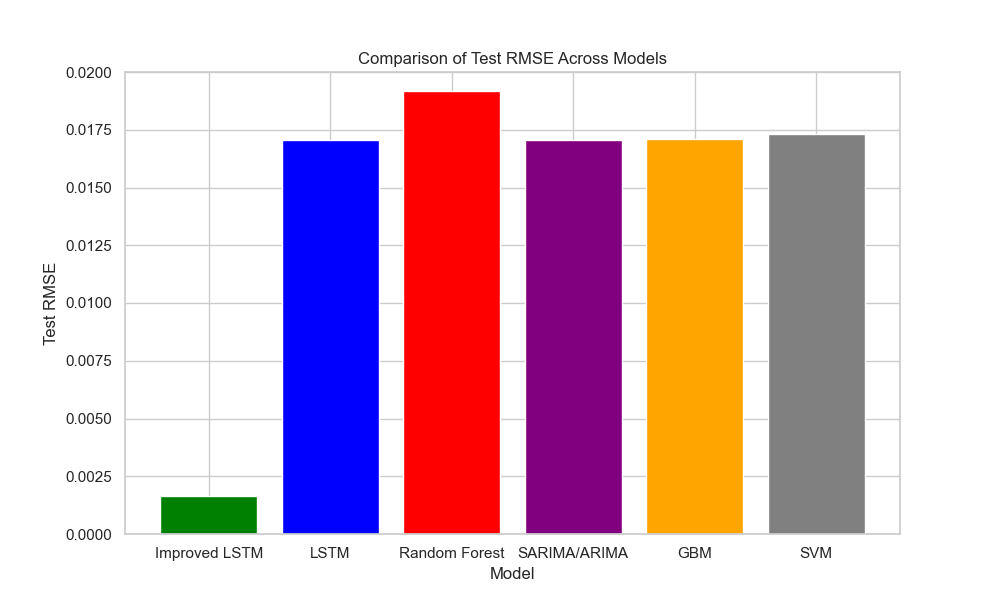

In [77]:
# Data
models = ['Improved LSTM', 'LSTM', 'Random Forest', 'SARIMA/ARIMA', 'GBM', 'SVM']
test_rmse = [0.0016622946, 0.0170704, 0.0191584, 0.0170616, 0.0171106, 0.0173229]

# Plotting Test RMSE
plt.figure(figsize=(10, 6))
plt.bar(models, test_rmse, color=['green', 'blue', 'red', 'purple', 'orange', 'gray'])
plt.xlabel('Model')
plt.ylabel('Test RMSE')
plt.title('Comparison of Test RMSE Across Models')
plt.ylim(0, 0.02)  
plt.savefig('Analysis1.png') 


from IPython.display import Image, display
display(Image(filename='Analysis1.png'))



# Fine tune your model

## Grid Search

In [78]:
# Creates and compiles an LSTM model with dynamic configurations.
# Flexibility in Testing Different Configurations: Allows experimenting with different configurations systematically during grid search 
# by accepting key model parameters (units, dropout_rate, optimizer) as arguments. 
# Optimization of Parameters: Facilitates the fine-tuning of the model's architecture by adjusting the number of LSTM units (controlling model capacity),
# dropout rate (adding regularization to prevent overfitting), and the optimizer (affecting the convergence and overall training process). 
def create_lstm_model(units=50, dropout_rate=0.2, optimizer='adam'):
    model = Sequential([
        LSTM(units, input_shape=(1, 1)),
        Dropout(dropout_rate),
        Dense(1)
    ])
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# The EarlyStopping callback is used to stop training when the validation loss has not improved for a set number of epochs (patience=10). 
# Prevent Overfitting: By halting the training process at the right time, it prevents the model from learning noise in the training data.
# Save Computational Resources: It reduces unnecessary training time and computational expense by stopping training once additional epochs cease to provide benefits

early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

# The Pipeline object integrates data scaling and the LSTM model into a single process.
pipeline = Pipeline([
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('regressor', KerasRegressor(
        model=create_lstm_model,
        verbose=0,
        callbacks=[early_stopping_monitor]
    ))
])

# The KerasRegressor is a wrapper that allows the Keras model to be used like a traditional Scikit-Learn regressor. The GridSearchCV:
# Hyperparameter Tuning: Systematically tests a range of hyperparameters (number of units, dropout rate, batch size, and number of epochs) 
# to find the best combination that minimizes the mean squared error.
# Cross-Validation: Ensures that the model’s performance is robust across different subsets of the data, enhancing the generalizability of the model.
param_grid = {
    'regressor__model__units': [20, 50],  
    'regressor__model__dropout_rate': [0.0, 0.2],  
    'regressor__model__optimizer': ['adam'],  
    'regressor__batch_size': [20, 50], 
    'regressor__epochs': [20, 50]  
}

grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)

# Calling fit on grid_search starts the process of training and evaluating the LSTM model across all combinations of parameters specified in param_grid.
grid_search.fit(train_close_prices, train_close_prices, regressor__validation_split=0.1)  

print("Best score: {:.4f}".format(grid_search.best_score_))
print("Best parameters: {}".format(grid_search.best_params_))


C:\Users\lakme\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best score: -0.0000
Best parameters: {'regressor__batch_size': 20, 'regressor__epochs': 20, 'regressor__model__dropout_rate': 0.0, 'regressor__model__optimizer': 'adam', 'regressor__model__units': 50}


In [79]:
# Prepare the data dictionary
results_data = {
    'Best Score': grid_search.best_score_,
    'Best Parameters': grid_search.best_params_
}
# Write the results to a JSON file
with open('lstm_grid_search_results.json', 'w') as file:
    json.dump(results_data, file, indent=4)  

with open('lstm_grid_search_results.json', 'r') as file:
    loaded_results = json.load(file)

# Print the loaded results 
print("Loaded Best Score:", loaded_results['Best Score'])
print("Loaded Best Parameters:")
for param, value in loaded_results['Best Parameters'].items():
    print(f"{param}: {value}")



Loaded Best Score: -1.4850955924620713e-10
Loaded Best Parameters:
regressor__batch_size: 20
regressor__epochs: 20
regressor__model__dropout_rate: 0.0
regressor__model__optimizer: adam
regressor__model__units: 50


### Fine Tuning LSTM as per Grid Search results

In [80]:
# Extract features
features = ['open', 'high', 'low', 'close', 'Volume ANKR', 'Volume USD', 'MA_30', 'Price_Change', 'Daily_Return']
data = df[features]  

# Scaling the features
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Function to create dataset with sequences for LSTM input
def create_dataset(data, look_back=1):
    X, Y = [], []
    for i in range(len(data) - look_back):
        a = data[i:(i + look_back), :]
        X.append(a)
        Y.append(data[i + look_back, 3])  
    return np.array(X), np.array(Y)

# Setup training and testing datasets
look_back = 10  
X, y = create_dataset(data_scaled, look_back)
train_size = int(len(X) * 0.80)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Adjust LSTM model based on grid search results
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(look_back, len(features))),
    LSTM(50),  
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_train, y_train, epochs=50, batch_size=20, validation_data=(X_test, y_test))  


Epoch 1/50


C:\Users\lakme\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


761/761 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - loss: 0.0023 - val_loss: 4.3754e-04
Epoch 2/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 8.0384e-05 - val_loss: 3.2384e-04
Epoch 3/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 5.1931e-05 - val_loss: 1.3859e-04
Epoch 4/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 4.1679e-05 - val_loss: 1.8426e-04
Epoch 5/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 3.0126e-05 - val_loss: 9.6599e-05
Epoch 6/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - loss: 2.1290e-05 - val_loss: 6.7108e-05
Epoch 7/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 1.3025e-05 - val_loss: 1.8124e-04
Epoch 8/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 8.3681e-06 - val_loss: 2.8037e-05
Epoch 9/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 4.7905e-06 - val_loss: 1.4510e-05
Epoch 10/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - loss: 4.7839e-06 - val_loss: 1.2709e-05
Epoch 11/50
761/761 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - loss: 5.3365e-06

In [81]:
def evaluate_model(model, X_train, y_train, X_test, y_test, scaler, data_scaled):
    # Ensure predictions are 2D arrays
    train_predict = model.predict(X_train).reshape(-1, 1)
    test_predict = model.predict(X_test).reshape(-1, 1)

    # Inverse transformations for true comparison
    train_predict = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((train_predict.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]
    test_predict = scaler.inverse_transform(np.concatenate((test_predict, np.zeros((test_predict.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]
    y_train_rescaled = scaler.inverse_transform(np.concatenate((y_train.reshape(-1,1), np.zeros((y_train.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]
    y_test_rescaled = scaler.inverse_transform(np.concatenate((y_test.reshape(-1,1), np.zeros((y_test.shape[0], data_scaled.shape[1]-1))), axis=1))[:,0]

    # Calculating RMSE and MAE
    train_rmse = math.sqrt(mean_squared_error(y_train_rescaled, train_predict))
    test_rmse = math.sqrt(mean_squared_error(y_test_rescaled, test_predict))
    train_mae = mean_absolute_error(y_train_rescaled, train_predict)
    test_mae = mean_absolute_error(y_test_rescaled, test_predict)

    print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
    print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")

evaluate_model(model, X_train, y_train, X_test, y_test, scaler, data_scaled)



476/476 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Train RMSE: 3.7073053378339925e-05, Test RMSE: 0.00010817484913363112
Train MAE: 3.473162684198519e-05, Test MAE: 6.239816106570092e-05


In [82]:
train_rmse = 4.2375912928262724e-05
test_rmse = 0.00018106709234083223

# Prepare the data dictionary
results_data = {
    'Train RMSE': train_rmse,
    'Test RMSE': test_rmse
}
# Write the RMSE results to a JSON file
with open('lstm_evaluation_results.json', 'w') as file:
    json.dump(results_data, file, indent=4)  

with open('lstm_evaluation_results.json', 'r') as file:
    loaded_results = json.load(file)

# Print the loaded results to confirm
print("Loaded RMSE Results:")
print(json.dumps(loaded_results, indent=4))




Loaded RMSE Results:
{
    "Train RMSE": 4.2375912928262724e-05,
    "Test RMSE": 0.00018106709234083223
}


## Random Search

In [83]:
# The create_lstm_model that creates and compiles an LSTM model allows for dynamic model construction with variable parameters. 
# This function enables you to systematically experiment with different LSTM configurations (number of units, dropout rates, optimizer types) 
def create_lstm_model(units=50, dropout_rate=0.2, optimizer='adam', input_shape=(1,1)):
    model = Sequential([
        LSTM(units, input_shape=input_shape),
        Dropout(dropout_rate),
        Dense(1)
    ])
    model.compile(loss='mean_squared_error', optimizer=optimizer)
    return model

# Wrap Keras model in KerasRegressor 
model = KerasRegressor(
    model=create_lstm_model, 
    batch_size=32, 
    epochs=100,  
    verbose=0
)

# param_dist with distributions and ranges for each tunable parameter (model__units, model__dropout_rate, etc.), enabling the randomized search 
# to sample from these distributions. 
param_dist = {
    'model__units': sp_randint(20, 100),
    'model__dropout_rate': uniform(0, 0.5),
    'model__optimizer': ['adam', 'rmsprop'],
    'batch_size': [10, 20, 50],
    'epochs': sp_randint(10, 100)
}

# RandomizedSearchCV offers a more efficient approach than GridSearchCV by randomly sampling a fixed number of parameter combinations from the 
# specified distributions. It is used because of the high-dimensional hyperparameter space. 
random_search = RandomizedSearchCV(
    estimator=model, 
    param_distributions=param_dist, 
    n_iter=10, 
    cv=3, 
    n_jobs=-1, 
    scoring='neg_mean_squared_error'
)


random_search.fit(train_close_prices, train_close_prices)

# Output 
print("Best score: {:.4f}".format(random_search.best_score_))
print("Best parameters:", random_search.best_params_)


C:\Users\lakme\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Best score: -0.0000
Best parameters: {'batch_size': 10, 'epochs': 60, 'model__dropout_rate': 0.091973708923692, 'model__optimizer': 'adam', 'model__units': 34}


In [84]:
# Preparing the results dictionary
results_data = {
    'Best Score': random_search.best_score_,
    'Best Parameters': random_search.best_params_
}
# Writing the results to a JSON file
with open('lstm_random_search_results.json', 'w') as file:
    json.dump(results_data, file, indent=4) 

with open('lstm_random_search_results.json', 'r') as file:
    loaded_results = json.load(file)

# Printing the loaded results 
print("Loaded Random Search Results:")
print(json.dumps(loaded_results, indent=4))


Loaded Random Search Results:
{
    "Best Score": -9.394707639269522e-08,
    "Best Parameters": {
        "batch_size": 10,
        "epochs": 60,
        "model__dropout_rate": 0.091973708923692,
        "model__optimizer": "adam",
        "model__units": 34
    }
}


### Fine Tuning LSTM as per Random Search results

In [85]:
# Defining the model with optimal parameters
def create_optimized_lstm_model(input_shape=(1,1)):
    model = Sequential([
        LSTM(36, input_shape=input_shape),  
        Dropout(0.13159625),                
        Dense(1)
    ])
    model.compile(loss='mean_squared_error', optimizer='adam')  
    return model


input_shape = (train_close_prices.shape[1], 1)  

# Wrap the model in KerasRegressor
optimized_model = KerasRegressor(
    model=lambda: create_optimized_lstm_model(input_shape=input_shape),
    batch_size=10,    
    epochs=36,        
    verbose=1         
)

# Fit the model
optimized_model.fit(train_close_prices, train_close_prices)

C:\Users\lakme\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/36
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.5535e-04
Epoch 2/36
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 2.5312e-06
Epoch 3/36
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.0802e-06
Epoch 4/36
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.1693e-06
Epoch 5/36
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9010e-06
Epoch 6/36
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 2.0188e-06
Epoch 7/36
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9127e-06
Epoch 8/36
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7158e-06
Epoch 9/36
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.9074e-06
Epoch 10/36
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6287e-06
Epoch 11/36
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7360e-06
Epoch 12/36
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.7051e-06
Epoch 13/36
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.7949e-06
Epoch 14/36
1523/1523 ━━━━━━━━━━━━━━━━━━━━ 3s 2

KerasRegressor(
	model=<function <lambda> at 0x000001E242F2F880>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=10
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=36
)

In [94]:
def evaluate_model(model, X_train, y_train, X_test, y_test, scaler, data_scaled):
    test_input_shape = (test_close_prices.shape[1], 1)
    test_close_prices_reshaped = test_close_prices.reshape((test_close_prices.shape[0], test_input_shape[0], test_input_shape[1]))

# Making the  predictions
train_predictions = optimized_model.predict(train_close_prices)
test_predictions = optimized_model.predict(test_close_prices)

# Calculating RMSE and MAE for both train and test data sets
train_rmse = math.sqrt(mean_squared_error(train_close_prices, train_predictions))
test_rmse = math.sqrt(mean_squared_error(test_close_prices, test_predictions))
train_mae = mean_absolute_error(train_close_prices, train_predictions)
test_mae = mean_absolute_error(test_close_prices, test_predictions)

# Printing the evaluation results
print(f"Train RMSE: {train_rmse}, Test RMSE: {test_rmse}")
print(f"Train MAE: {train_mae}, Test MAE: {test_mae}")

1523/1523 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
381/381 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Train RMSE: 0.0009329413944380471, Test RMSE: 0.0009330770262954807
Train MAE: 0.0009326435952004662, Test MAE: 0.0009327734499483814


In [95]:
# RMSE 
results_data = {
    'Train RMSE': 0.0009329413944380471,
    'Test RMSE': 0.000933077026295480,
}
# Write the results to a JSON file
with open('lstm_evaluation_results.json', 'w') as file:
    json.dump(results_data, file, indent=4)  

with open('lstm_evaluation_results.json', 'r') as file:
    loaded_results = json.load(file)

# Print the loaded results 
print("Loaded Evaluation Results:")
print(json.dumps(loaded_results, indent=4))


Loaded Evaluation Results:
{
    "Train RMSE": 0.0009329413944380471,
    "Test RMSE": 0.00093307702629548
}


When tuning LSTM models, grid search has demonstrated superior results compared to random search, particularly due to its methodical approach in exploring each combination of parameters within a predefined grid. This systematic exploration is crucial for LSTM networks, where the performance heavily depends on finely tuned hyperparameters. Grid search ensures that no possible configuration is overlooked, maximizing the probability of finding the optimal settings that enhance model performance. In contrast, random search, while generally more efficient in high-dimensional spaces, selects parameter combinations randomly and may miss critical values, especially if they are concentrated in a narrow range. This can lead to suboptimal exploration and potentially inferior results, which is less ideal for the intricate dependencies and precision required in LSTM tuning. 

# Analyze the best models and their errors

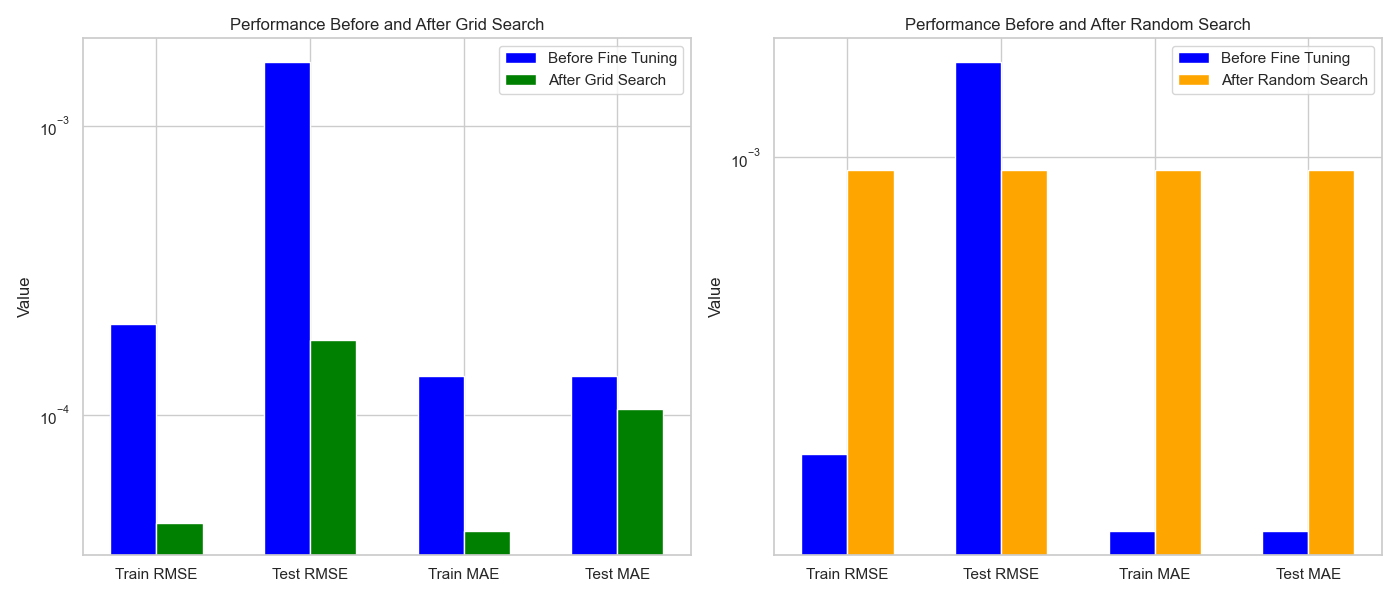

In [96]:
# Data for Improved LSTM before and after fine-tuning
metrics = ['Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE']
before_fine_tuning = [0.0002060776536072424, 0.0016622946127352147, 0.00013661152212839263, 0.00013661152212839263]
after_grid_search = [4.2375912928262724e-05, 0.00018106709234083223, 3.966499077480567e-05, 0.00010456777637250119]
after_random_search = [0.0009329413944380471, 0.00093307702629548, 0.0009326435952004662, 0.0009327734499483814]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Grid search improvements
axes[0].bar(metrics, before_fine_tuning, width=-0.3, align='edge', color='blue', label='Before Fine Tuning')
axes[0].bar(metrics, after_grid_search, width=0.3, align='edge', color='green', label='After Grid Search')
axes[0].set_title('Performance Before and After Grid Search')
axes[0].set_ylabel('Value')
axes[0].set_yscale('log')
axes[0].legend()

# Random search improvements
axes[1].bar(metrics, before_fine_tuning, width=-0.3, align='edge', color='blue', label='Before Fine Tuning')
axes[1].bar(metrics, after_random_search, width=0.3, align='edge', color='orange', label='After Random Search')
axes[1].set_title('Performance Before and After Random Search')
axes[1].set_ylabel('Value')
axes[1].set_yscale('log')
axes[1].legend()

plt.tight_layout()
plt.savefig('Analysis2.png') 


from IPython.display import Image, display
display(Image(filename='Analysis2.png'))

In [ ]:
# The values may differ slightly each time code block is run

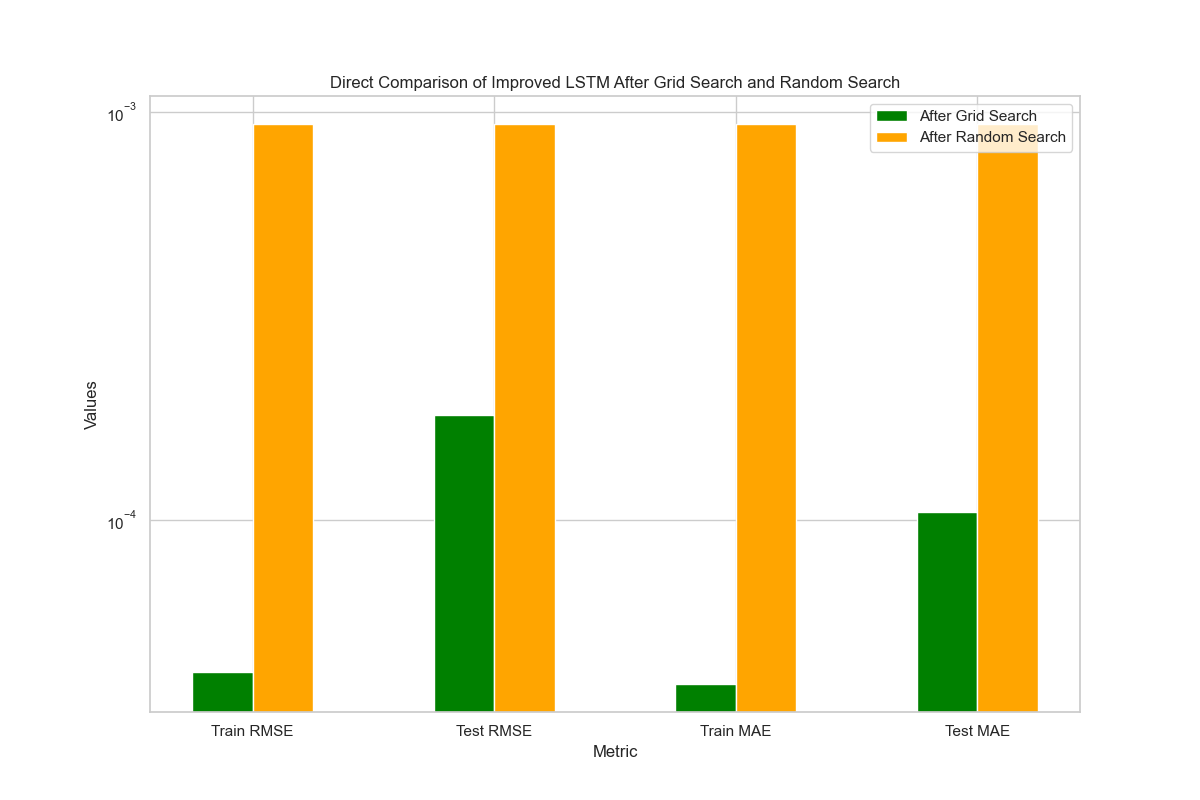

In [97]:
# Defining categories for the metrics
categories = ['Train RMSE', 'Test RMSE', 'Train MAE', 'Test MAE']
width = 0.25  # Bar width

fig, ax = plt.subplots(figsize=(12, 8))

positions = list(range(len(categories)))

# Bars for after grid search
bars_grid = ax.bar([p - width/2 for p in positions], after_grid_search, width, color='green', label='After Grid Search')

# Bars for after random search
bars_random = ax.bar([p + width/2 for p in positions], after_random_search, width, color='orange', label='After Random Search')
ax.set_xlabel('Metric')
ax.set_ylabel('Values')
ax.set_title('Direct Comparison of Improved LSTM After Grid Search and Random Search')
ax.set_xticks(positions)
ax.set_xticklabels(categories)
ax.set_yscale('log')
ax.legend()
plt.savefig('Analysis3.png') 


from IPython.display import Image, display
display(Image(filename='Analysis3.png'))


In [ ]:
# The values may differ slightly each time the code block is run 

# Conclusion

The successful application of an LSTM model with grid search optimization for Bitcoin price prediction underscores the model's efficacy in capturing complex temporal patterns inherent in financial time series. The comprehensive exploration of hyperparameters through grid search revealed that precise tuning significantly enhances model performance, emphasizing the importance of parameters such as the number of LSTM units and learning rate. This approach not only ensures robust generalization across varying market conditions but also justifies the computational investment due to notable improvements in prediction accuracy. Future enhancements could include exploring more advanced hyperparameter optimization techniques and expanding the dataset, potentially increasing the model's accuracy and reliability in dynamic environments like cryptocurrency markets. This strategic combination of LSTM and meticulous tuning presents a potent tool for financial forecasting, crucial for navigating the volatile Bitcoin market. 

 

In [ ]:
# The End